In [8]:
# Bài 1

def almostIncreasingSequence(sequence: list) -> bool:
    count = 0
    n = len(sequence)
    
    for i in range(1, n):
        if sequence[i] <= sequence[i-1]:
            count += 1
            
            if count > 1:
                return False

            can_remove_prev = True
            if i > 1 and sequence[i-2] >= sequence[i]:
                can_remove_prev = False
            
            can_remove_curr = True
            if i + 1 < n and sequence[i-1] >= sequence[i+1]:
                can_remove_curr = False
            
            if not can_remove_prev and not can_remove_curr:
                return False
    
    return True

print(almostIncreasingSequence([1, 3, 2, 1]))
print(almostIncreasingSequence([1, 3, 2]))      

False
True


In [6]:
# Bài 2

class Account:
    def __init__(self, stk, tentk, sodu):
        self.stk = stk
        self.tentk = tentk
        self.sodu = sodu

    def deposit(self, amount):
        self.sodu += amount
        print(f"Đã nạp {amount}đ vào tài khoản {self.tentk}.")

    def withdraw(self, amount):
        if amount <= self.sodu:
            self.sodu -= amount
            print(f"Đã rút {amount}đ từ tài khoản {self.tentk}.")
        else:
            print("Số dư không đủ!")

    def __str__(self):
        return f"Tài khoản: {self.stk}, Tên: {self.tentk}, Số dư: {self.sodu}đ"


class Bank:
    def __init__(self):
        self.accounts = []

    def add_account(self, account):
        self.accounts.append(account)

    def find_account(self, stk):
        for acc in self.accounts:
            if acc.stk == stk:
                return acc
        return None


bank = Bank()
acc1 = Account('12345', 'Nguyễn Thị Vân', 1000000)
acc2 = Account('54321', 'Trần Đức Tiến', 5000000)

bank.add_account(acc1)
bank.add_account(acc2)

acc1.deposit(2000000)
acc2.withdraw(3000000)

found = bank.find_account('12345')
if found:
    print(found)

Đã nạp 2000000đ vào tài khoản Nguyễn Thị Vân.
Đã rút 3000000đ từ tài khoản Trần Đức Tiến.
Tài khoản: 12345, Tên: Nguyễn Thị Vân, Số dư: 3000000đ


In [9]:
# Bài 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Câu 1
df = pd.read_csv("../tech_companies.csv")
print(f"Shape trước: {df.shape}")
df = df.dropna()
print(f"Shape sau: {df.shape}")

Shape trước: (50, 8)
Shape sau: (47, 8)


In [20]:
df

,Company Name,Industry,State,Founding Year,Revenue,Market Cap,Stock Name,Employees
0,Apple Inc.,Consumer Electronics,California,1998,387.53,2520,AAPL,"1,640"
1,Microsoft Corporation,Software Infrastructure,Washington,2007,204.09,2037,MSFT,"2,210"
2,Alphabet (Google),Software Infrastructure,California,2008,282.83,1350,GOOG,"1,902"
3,Amazon,Software Application,Washington,2014,513.98,1030,AMZN,"1,541"
4,NVIDIA Corporation,Semiconductors,California,2020,26.97,653,NVDA,225
5,Tesla,Software Infrastructure,Texas,1993,81.46,625,TSLA,"1,279"
6,Meta Platforms,Software Infrastructure,California,2018,116.60,524,META,865
7,Broadcom Inc.,Semiconductors,California,1997,34.41,266,AVGO,200
8,Oracle Corporation,Software Infrastructure,Texas,1991,46.07,236,ORCL,"1,430"
9,Cisco Systems Inc.,Communication Equipments,California,1998,53.16,208,CSCO,833


In [16]:
# Câu 2
avg_marketcap = df["Market Cap"].mean()
print(f"Giá trị trung bình Market Cap: {avg_marketcap:.2f}")

Giá trị trung bình Market Cap: 264.83


In [26]:
# Câu 3
companies_per_industry = df.groupby("Industry").size()
print("Số lượng công ty nhóm theo ngành:\n\n", companies_per_industry)

Số lượng công ty nhóm theo ngành:

 Industry
Communication Equipments     1
Computer Hardware            3
Consumer Electronics         1
Electronic Components        1
IT Services                  3
Semiconductors              14
Software Application        14
Software Infrastructure     10
dtype: int64


In [27]:
# Câu 4
top_5_tech = df["State"].value_counts().head(5)
print("5 bang có nhiều công ty công nghệ nhất:\n\n", top_5_tech)

5 bang có nhiều công ty công nghệ nhất:

 State
California     30
Texas           4
Washington      2
New York        2
Connecticut     1
Name: count, dtype: int64


In [30]:
# Câu 5
highest_cap_company = df.loc[df["Market Cap"].idxmax()]
lowest_cap_company = df.loc[df["Market Cap"].idxmin()]
print("Công ty có Market Cap cao nhất: ", highest_cap_company["Company Name"])
print("Công ty có Market Cap thấp nhất: ", lowest_cap_company["Company Name"])

Công ty có Market Cap cao nhất:  Apple Inc.
Công ty có Market Cap thấp nhất:  Dell Technologies Inc.


In [33]:
# Câu 6
avg_revenue_by_industry = df.groupby("Industry")["Revenue"].mean()
print("Trung bình doanh thu theo Industry: \n\n", avg_revenue_by_industry)

Trung bình doanh thu theo Industry: 

 Industry
Communication Equipments     53.160000
Computer Hardware            55.486667
Consumer Electronics        387.530000
Electronic Components         5.610000
IT Services                  28.503333
Semiconductors               23.467857
Software Application         50.402857
Software Infrastructure      81.144000
Name: Revenue, dtype: float64


In [ ]:
# Câu 7
industry_highest_avg_revenue = avg_revenue_by_industry.idxmax() # ngành
highest_avg_revenue_value = avg_revenue_by_industry.max() # revenue
print("Ngành có doanh thu trung bình cao nhất: {} ở mức {} tỷ đô.".format(industry_highest_avg_revenue, highest_avg_revenue_value))

Ngành có doanh thu trung bình cao nhất: Consumer Electronics ở mức 387.53 tỷ đô.


In [ ]:
# Câu 8
newest_company = df.loc[df['Founding Year'].idxmax()]
oldest_company = df.loc[df['Founding Year'].idxmin()]
print("Công ty thành lập gần đây nhất: ", newest_company["Company Name"])
print("Công ty thành lập lâu đời nhất: ", oldest_company["Company Name"])

Công ty thành lập gần đây nhất:  NVIDIA Corporation
Công ty thành lập lâu đời nhất:  Booking Holdings


In [43]:
# Câu 9
software_companies = df[df["Industry"] == "Software Application"]
state_counts_software = software_companies["State"].value_counts()
print(state_counts_software)
state_most_se = state_counts_software.idxmax()
count_se_comp = state_counts_software.max()
print("\nBang nhiều công ty Software Application nhất: ", state_most_se)
print("Số lượng: ", count_se_comp)

State
California        9
Washington        1
Connecticut       1
New Jersey        1
Montana           1
North Carolina    1
Name: count, dtype: int64

Bang nhiều công ty Software Application nhất:  California
Số lượng:  9


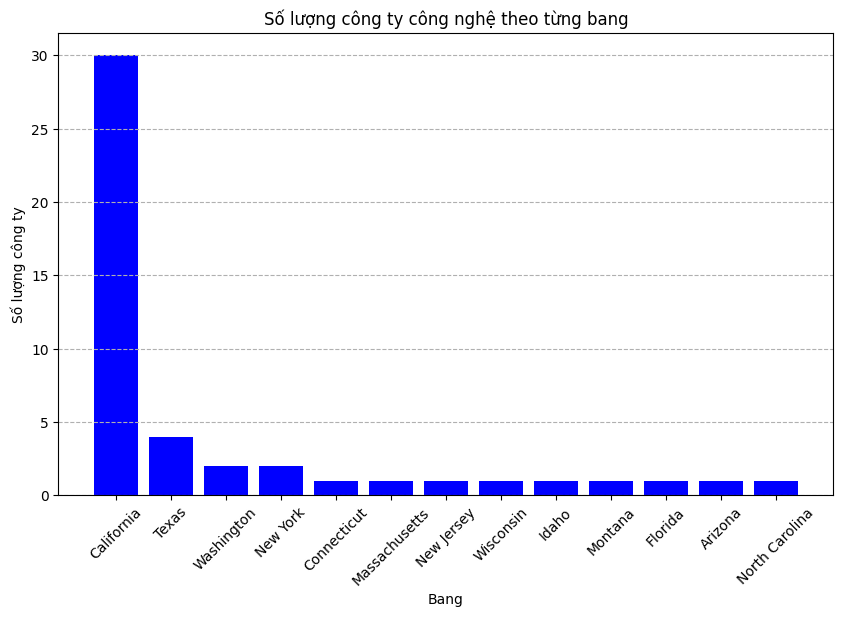

In [46]:
# Câu 10
plt.figure(figsize=(10, 6))

state_counts_df = df["State"].value_counts()
states = state_counts_df.index
counts = state_counts_df.values

plt.bar(states, counts, color="blue")
plt.title('Số lượng công ty công nghệ theo từng bang')
plt.xlabel('Bang')
plt.ylabel('Số lượng công ty')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

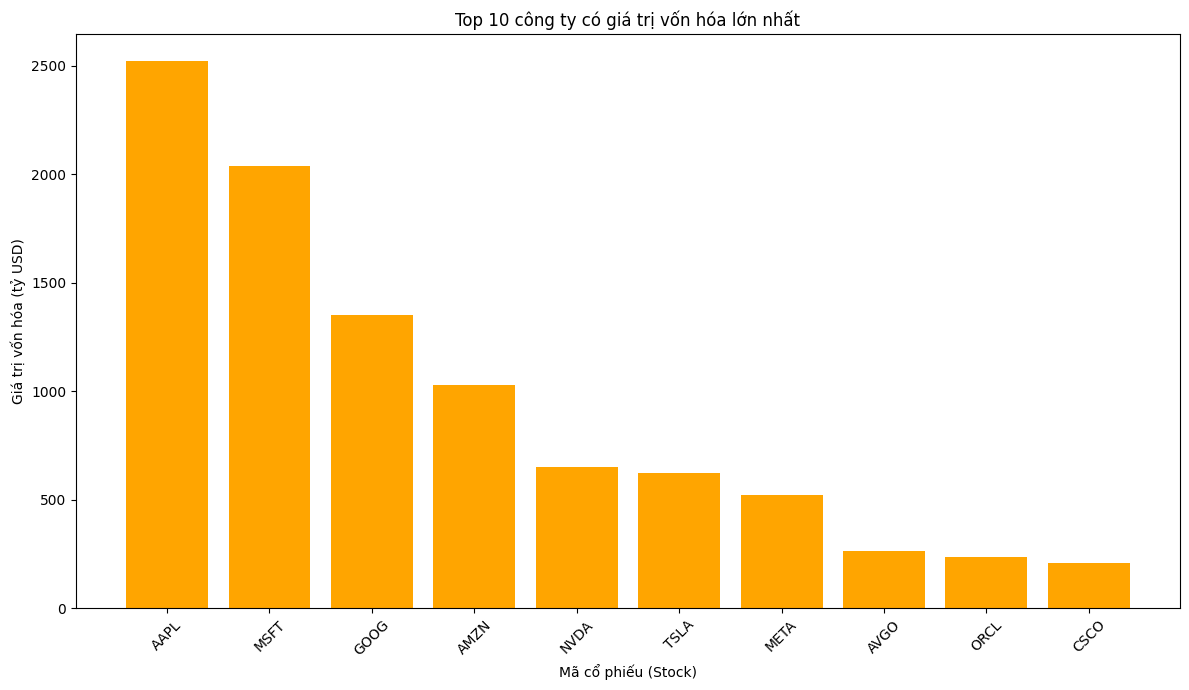

In [52]:
# Câu 11
top_10_marketcap = df.nlargest(10, 'Market Cap')
plt.figure(figsize=(12, 7))
plt.bar(top_10_marketcap['Stock Name'], top_10_marketcap['Market Cap'], color='orange')
plt.title('Top 10 công ty có giá trị vốn hóa lớn nhất')
plt.xlabel('Mã cổ phiếu (Stock)')
plt.ylabel('Giá trị vốn hóa (tỷ USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

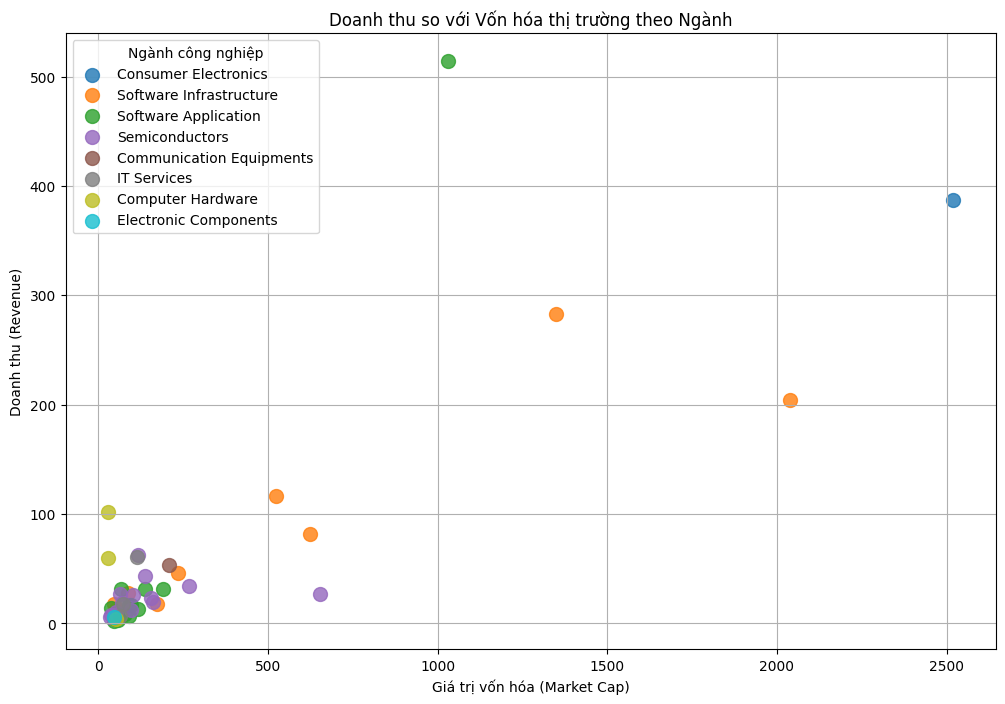

In [55]:
# Câu 12
plt.figure(figsize=(12, 8))
industries = df['Industry'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(industries)))

for i, industry in enumerate(industries):
    industry_data = df[df['Industry'] == industry]
    plt.scatter(industry_data['Market Cap'], industry_data['Revenue'], 
                label=industry, color=colors[i], s=100, alpha=0.8)

plt.title('Doanh thu so với Vốn hóa thị trường theo Ngành')
plt.xlabel('Giá trị vốn hóa (Market Cap)')
plt.ylabel('Doanh thu (Revenue)')
plt.legend(title='Ngành công nghiệp')
plt.grid(True)
plt.show()

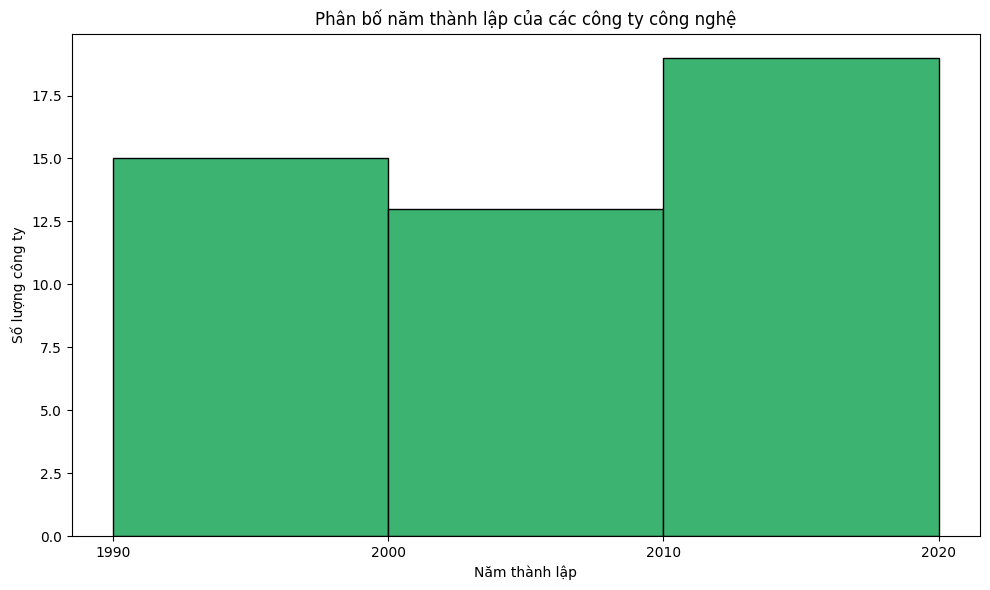

In [57]:
# Câu 13
plt.figure(figsize=(10, 6))
bins = [1990, 2000, 2010, 2020]
plt.hist(df['Founding Year'], bins=bins, edgecolor='black', color='mediumseagreen')
plt.title('Phân bố năm thành lập của các công ty công nghệ')
plt.xlabel('Năm thành lập')
plt.ylabel('Số lượng công ty')
plt.xticks(bins)
plt.tight_layout()
plt.show()

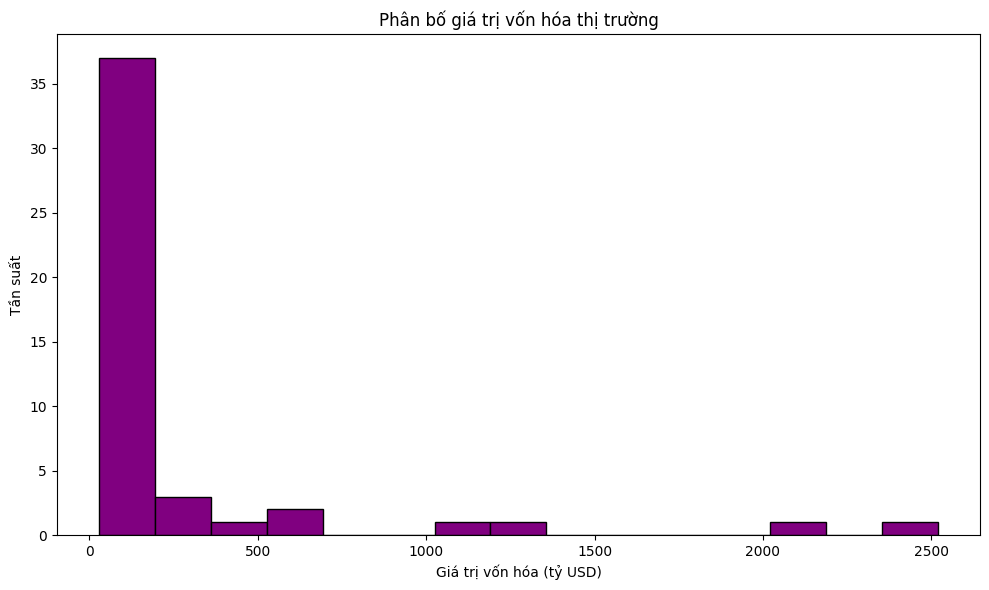

In [59]:
# Câu 14
plt.figure(figsize=(10, 6))
plt.hist(df['Market Cap'], bins=15, edgecolor='black', color='purple')
plt.title('Phân bố giá trị vốn hóa thị trường')
plt.xlabel('Giá trị vốn hóa (tỷ USD)')
plt.ylabel('Tần suất')
plt.tight_layout()
plt.show()

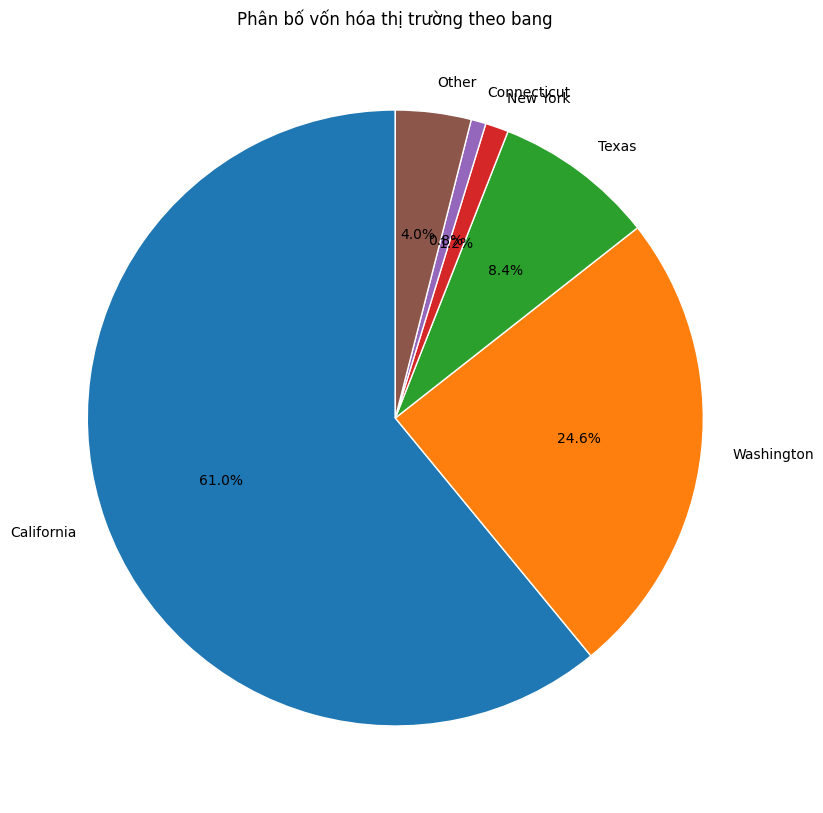

In [64]:
# Câu 15:
marketcap_by_state = df.groupby('State')['Market Cap'].sum().sort_values(ascending=False)

if len(marketcap_by_state) > 5:
    top_5 = marketcap_by_state.head(5)
    others_sum = marketcap_by_state[5:].sum()
    pie_data = pd.concat([top_5, pd.Series({'Other': others_sum})])
else:
    pie_data = marketcap_by_state

plt.figure(figsize=(10, 10))
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Phân bố vốn hóa thị trường theo bang')
plt.ylabel('')
plt.show()